# Загрузка библиотек и датасетов

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
ds = xr.open_dataset('C:/Users/osk_2/Python Notebooks/Global_Reservoirs_Methane_1918/Global_Reservoirs_Methane_1918/data/reservoir_methane_emissions.nc')
ds

<xarray.Dataset>
Dimensions:                             (day: 365, nv: 2, lon: 1440, lat: 720)
Coordinates:
  * lon                                 (lon) float64 -179.9 -179.6 ... 179.9
  * lat                                 (lat) float64 -89.88 -89.62 ... 89.88
Dimensions without coordinates: day, nv
Data variables:
    climatology_bounds                  (day, nv) float32 ...
    crs                                 int32 ...
    time                                (day) datetime64[ns] ...
    emission_season                     (lat, lon) timedelta64[ns] ...
    total_emission_rate                 (day, lat, lon) float32 ...
    boreal_emission_rate                (day, lat, lon) float32 ...
    temperate_emission_rate             (day, lat, lon) float32 ...
    tropical_subtropical_emission_rate  (day, lat, lon) float32 ...
Attributes:
    comment:                Contact for questions: Matthew Johnson (matthew.s...
    publisher_type:         institution
    publisher_institution:  Oak Ridge National Laboratory Distributed Active ...
    publisher_url:          daac.ornl.gov
    publisher_email:        uso@daac.ornl.gov
    Conventions:            CF-1.6
    title:                  Daily rates of methane emissions from inland dam-...

In [3]:
dsq = xr.open_dataset('C:/Users/osk_2/Python Notebooks/Global_Reservoirs_Methane_1918/Global_Reservoirs_Methane_1918/data/reservoir_area.nc')
dsq

<xarray.Dataset>
Dimensions:                    (lon: 1440, lat: 720)
Coordinates:
  * lon                        (lon) float64 -179.9 -179.6 ... 179.6 179.9
  * lat                        (lat) float64 -89.88 -89.62 ... 89.62 89.88
Data variables:
    crs                        int32 ...
    total_fraction             (lat, lon) float32 ...
    total_area                 (lat, lon) float32 ...
    boreal_area                (lat, lon) float32 ...
    temperate_area             (lat, lon) float32 ...
    tropical_subtropical_area  (lat, lon) float32 ...
Attributes:
    title:                  Area and area fraction of inland dam-reservoir sy...
    publisher_type:         institution
    publisher_institution:  Oak Ridge National Laboratory Distributed Active ...
    publisher_url:          daac.ornl.gov
    publisher_email:        uso@daac.ornl.gov
    Conventions:            CF-1.6

# Функции для обработки данных

In [4]:
def merger(df1, df2):
    merged = xr.merge([df1, df2])
    merged['corrected_emission'] = merged['total_emission_rate']/merged['total_fraction']
    return merged

In [5]:
def map_drawer(data, lat, lon, stack=True):
    if stack == True:
        data = data.stack(gridcell=["lat", "lon"])
        data = data.groupby("gridcell").mean('day').unstack("gridcell")
    plt.figure(figsize=(20, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='None') 
    #параметр alpha - изменение прозрачности объекта в matplotlib
    ax.add_feature(cfeature.RIVERS)
    g1 = ax.gridlines(draw_labels=True)
    g1.top_labels = False
    g1.right_labels = False
    g1.xlocator = mticker.FixedLocator(lon)
    g1.ylocator = mticker.FixedLocator(lat)
    data.plot(transform=ccrs.PlateCarree(), 
              robust=True, 
              cmap='seismic', levels=8)

# % площади, занятой водохранилищами, по ячейкам

По Цимлянскому водохранилищу

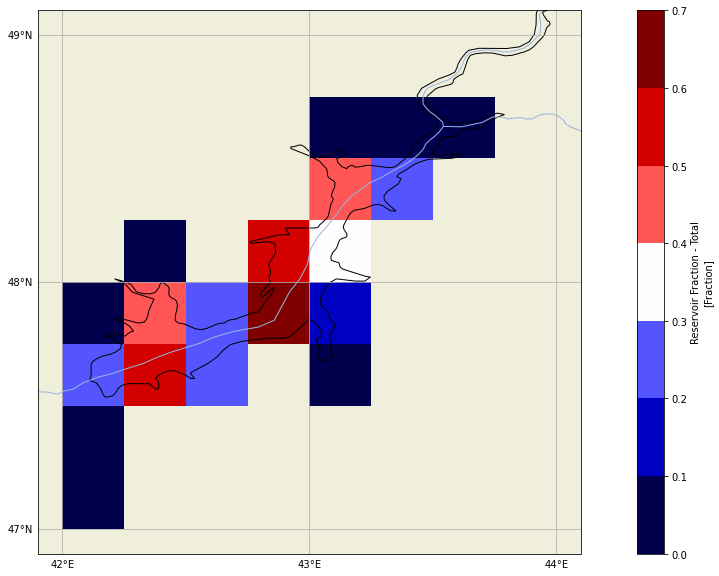

In [6]:
dsq_ts = dsq['total_fraction'].loc[47:49, 42:44]
map_drawer(dsq_ts, [47, 48, 49], [42, 43, 44], stack=False)

По Иваньковскому водохранилищу

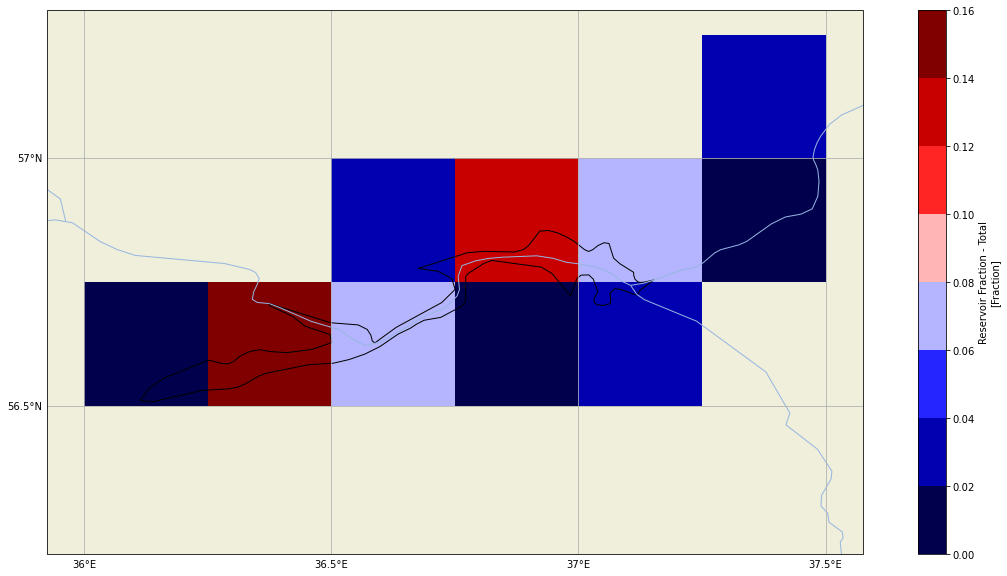

In [7]:
dsq_iv = dsq['total_fraction'].loc[56.3:57.3, 36:37.5]
map_drawer(dsq_iv, np.arange(56, 57.5, 0.5,), np.arange(36, 37.6, 0.5), stack=False)

Поскольку Чиркейское водохранилище почти полностью расположено в пределах ячейки с координатами центра 42.875 с.ш., 46.875 в.д., оно не было картированов рамках данной работы. По этой же причине для извлечения данных о нём везде ниже был написан отдельный код.

In [8]:
dsq_ch = dsq['total_fraction'].loc[42.875, 46.875].values
dsq_ch

array(0.05329752)

# Год в целом

Для Цимлянского водохранилища

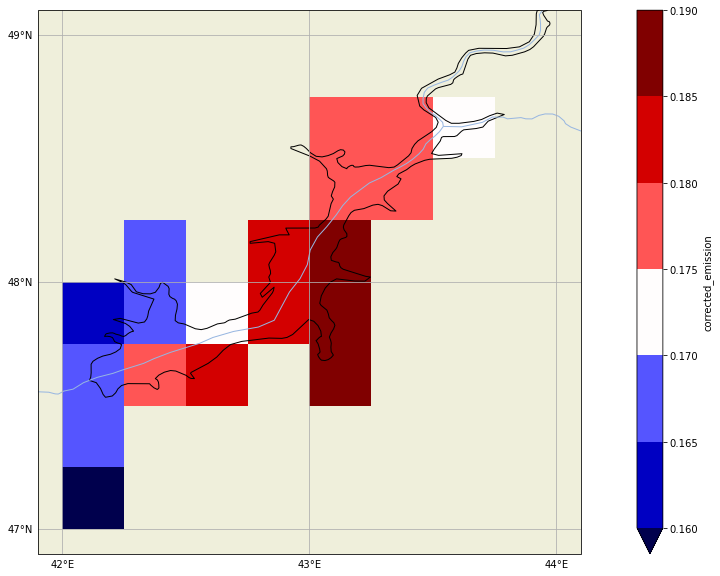

In [9]:
year_ts = ds['total_emission_rate'].loc[:, 47:49, 42:44]
year_ts = merger(dsq_ts, year_ts)
map_drawer(year_ts['corrected_emission'], [47, 48, 49], [42, 43, 44])

Для Иваньковского водохранилища

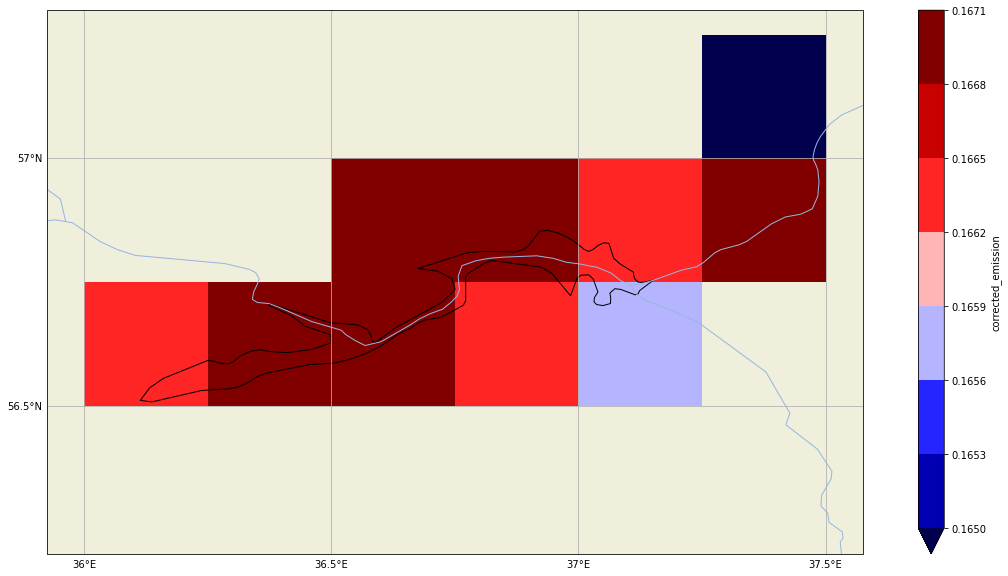

In [10]:
year_iv = ds['total_emission_rate'].loc[:, 56.3:57.3, 36:37.5]
year_iv = merger(dsq_iv, year_iv)
map_drawer(year_iv['corrected_emission'], np.arange(56, 57.5, 0.5,), np.arange(36, 37.6, 0.5))

Для Чиркейского водохранилища выводится среднегодовое значение эмиссии метана с его поверхности.

In [11]:
year_ch = ds['total_emission_rate'].loc[:, 42.875, 46.875]
year_ch = year_ch.mean('day')
float(year_ch/dsq_ch)

0.16675918001775922

# Весна

Цимлянское водохранилище

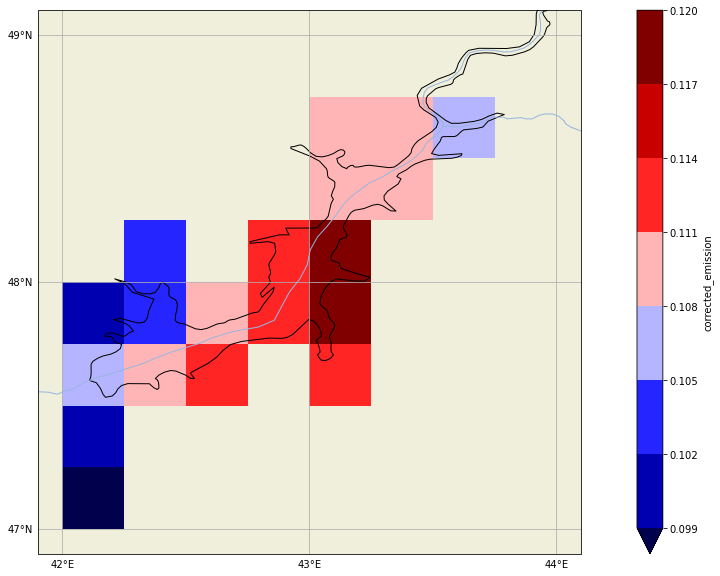

In [12]:
spring_ts = ds['total_emission_rate'].loc[60:152, 47:49, 42:44]
spring_ts = merger(dsq_ts, spring_ts)
map_drawer(spring_ts['corrected_emission'], [47, 48, 49], [42, 43, 44])

Иваньковское водохранилище

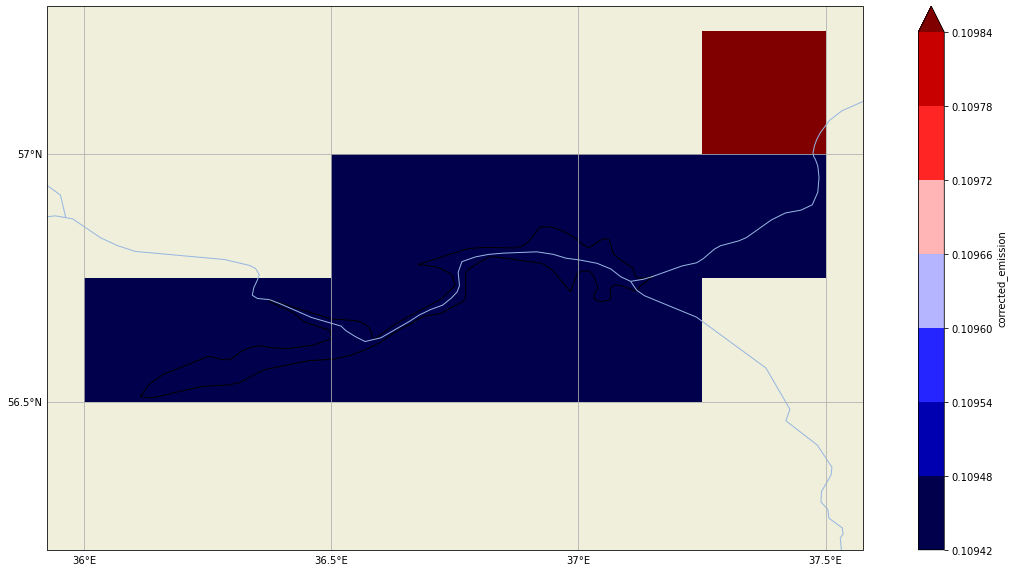

In [13]:
spring_iv = ds['total_emission_rate'].loc[60:152, 56.3:57.3, 36:37.5]
spring_iv = merger(dsq_iv, spring_iv)
map_drawer(spring_iv['corrected_emission'], np.arange(56, 57.5, 0.5,), np.arange(36, 37.6, 0.5))

Средневесеннее значение потока метана с поверхности Чиркейского водохранилища

In [14]:
spring_ch = ds['total_emission_rate'].loc[60:152, 42.875, 46.875]
spring_ch = spring_ch.mean('day')
float(spring_ch/dsq_ch)

0.10988131008271228

# Лето

Цимлянское водохранилище

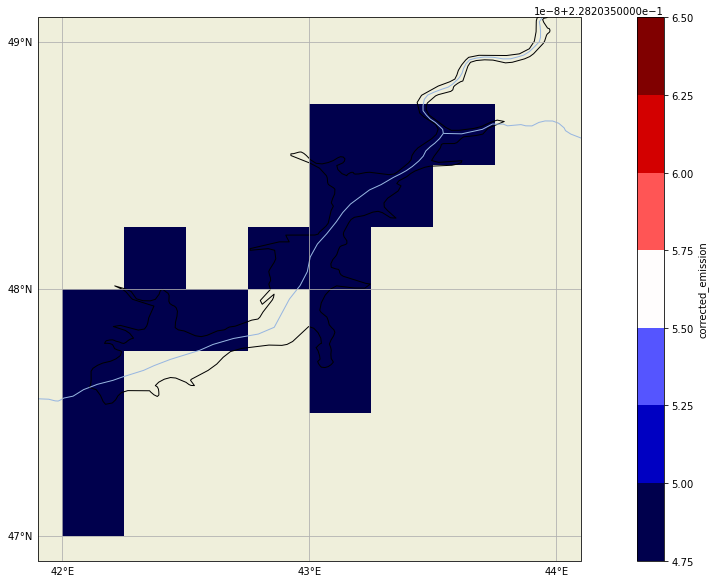

In [15]:
summer_ts = ds['total_emission_rate'].loc[152:244, 47:49, 42:44]
summer_ts = merger(dsq_ts, summer_ts)
map_drawer(summer_ts['corrected_emission'], [47, 48, 49], [42, 43, 44])

Причиной некорректного составления карты программой по всей видимости является то, что после нормирования эмиссии $СН_{4}$ с ячейки на долю площади водохранилища в ячейке во всех ячейках получились практически идентичные значения.

In [16]:
summer_ts = ds['total_emission_rate'].loc[152:244, 47:49, 42:44]
summer_ts = merger(dsq_ts, summer_ts)
q = summer_ts['corrected_emission']
q = q.stack(gridcell=['lat', 'lon'])
q = q.groupby("gridcell").mean('day').unstack("gridcell")
q

<xarray.DataArray 'corrected_emission' (lat: 8, lon: 8)>
array([[0.22820355,        nan,        nan,        nan,        nan,
               nan,        nan,        nan],
       [0.22820355,        nan,        nan,        nan,        nan,
               nan,        nan,        nan],
       [0.22820355, 0.22820356, 0.22820356,        nan, 0.22820355,
               nan,        nan,        nan],
       [0.22820355, 0.22820355, 0.22820355, 0.22820356, 0.22820355,
               nan,        nan,        nan],
       [       nan, 0.22820355,        nan, 0.22820355, 0.22820355,
               nan,        nan,        nan],
       [       nan,        nan,        nan,        nan, 0.22820355,
        0.22820355,        nan,        nan],
       [       nan,        nan,        nan,        nan, 0.22820355,
        0.22820355, 0.22820355,        nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan]], dtype=float32)
Coordinates:
  * lat      (lat) float64 47.12 47.38 47.62 47.88 48.12 48.38 48.62 48.88
  * lon      (lon) float64 42.12 42.38 42.62 42.88 43.12 43.38 43.62 43.88

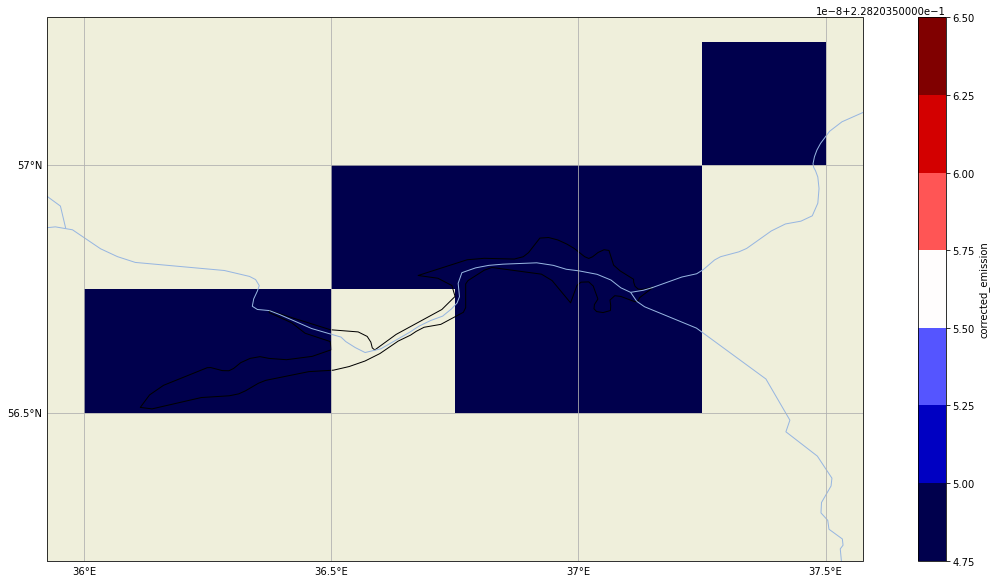

In [17]:
summer_iv = ds['total_emission_rate'].loc[152:244, 56.3:57.3, 36:37.5]
summer_iv = merger(dsq_iv, summer_iv)
map_drawer(summer_iv['corrected_emission'], np.arange(56, 57.5, 0.5,), np.arange(36, 37.6, 0.5))

Среднее летнее значение потока метана для Чиркейского водохранилища. Боюсь, что тут комментарии излишни

In [18]:
summer_ch = ds['total_emission_rate'].loc[152:244, 42.875, 46.875]
summer_ch = summer_ch.mean('day')
float(summer_ch/dsq_ch)

0.22820353878508226

# Осень

Цимлянское водохранилище

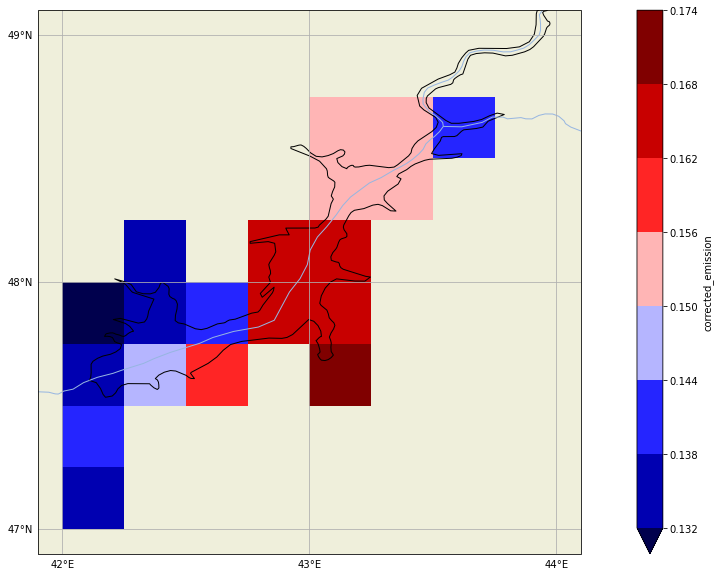

In [19]:
autumn_ts = ds['total_emission_rate'].loc[244:335, 47:49, 42:44]
autumn_ts = merger(dsq_ts, autumn_ts)
map_drawer(autumn_ts['corrected_emission'], [47, 48, 49], [42, 43, 44])

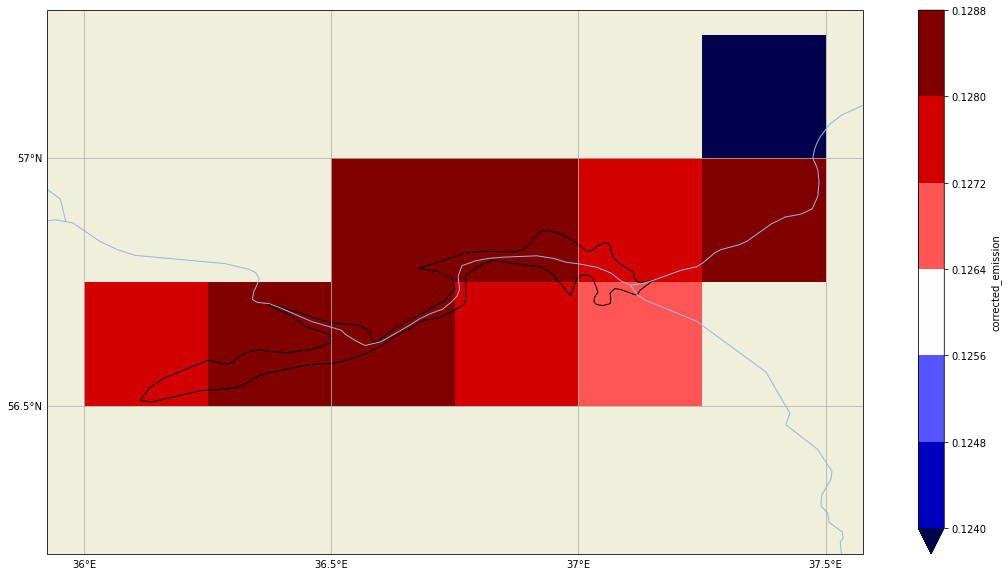

In [20]:
iv_autumn = ds['total_emission_rate'].loc[244:335, 56.3:57.3, 36:37.5]
iv_autumn = merger(dsq_iv, iv_autumn)
map_drawer(iv_autumn['corrected_emission'], np.arange(56, 57.5, 0.5,), np.arange(36, 37.6, 0.5))

# Временная изменчивость

Годовой ход эмиссии метана в Чиркейском вдхр.

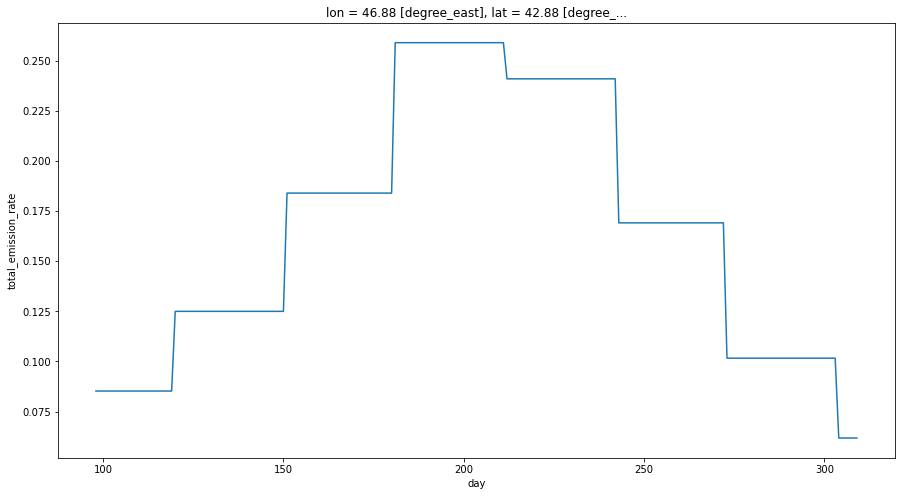

In [21]:
year_ch = ds['total_emission_rate'].loc[:, 42.875, 46.875]
year_ch = year_ch/dsq_ch
plt.figure(figsize=[15, 8])
year_ch.plot()

Цимлянское водохранилище

Text(0.5, 1.0, 'Methane emission per cell')

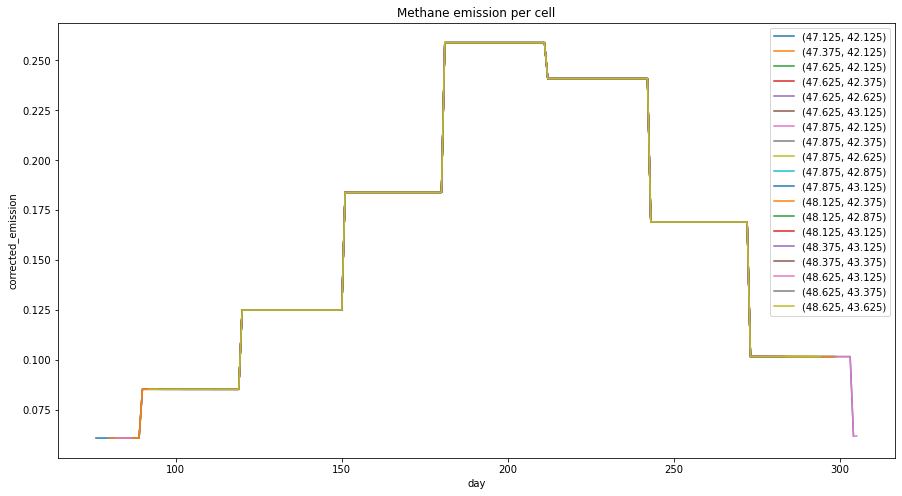

In [22]:
ts = year_ts['corrected_emission']
ts = ts.stack(gridcell = ['lat', 'lon'])
ts = ts[:, ~np.isnan(ts).all(axis=0)]
plt.figure(figsize=[15, 8])
for i in range(len(ts.gridcell)):
    ts[:, i].plot(label =f'{ts.gridcell[i].values}')
plt.legend()
plt.title('Methane emission per cell')

Иваньковское водохранилище

Text(0.5, 1.0, 'Methane emission per cell')

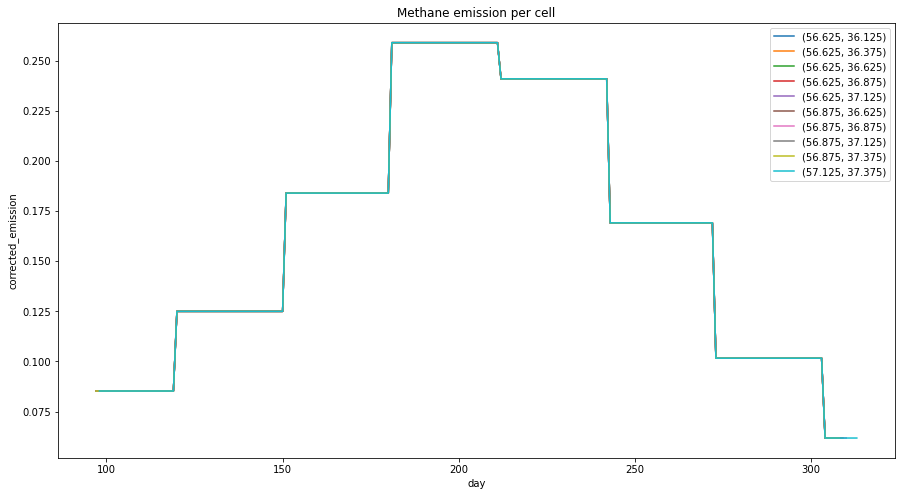

In [23]:
iv = year_iv['corrected_emission']
iv = iv.stack(gridcell = ['lat', 'lon'])
iv = iv[:, ~np.isnan(iv).all(axis=0)]
plt.figure(figsize=[15, 8])
for i in range(len(iv.gridcell)):
    iv[:, i].plot(label =f'{iv.gridcell[i].values}')
plt.legend()
plt.title('Methane emission per cell')

# Примеры извлечения числовых значений характеристик

Ниже приведены примеры кода для извлечения значений основных характеристик потока метана с ячеек. С небольшими изменениями данный код может использоваться для извлечения информации по другим объектам.

В рамках курсовой работы все рассматриваемые ниже характеристики была получены для всех объектов исследования. Их значения приведены в тексте курсовой работы.

Средние значения эмиссии метана в Цимлянском водохранилище по ячейкам

In [24]:
mean_ts = ts.groupby('gridcell').mean('day')
for i in mean_ts:
    print(i.values, i.gridcell.values)

0.15972716 (47.125, 42.125)
0.16564551 (47.375, 42.125)
0.1673856 (47.625, 42.125)
0.1757756 (47.625, 42.375)
0.18181059 (47.625, 42.625)
0.18532553 (47.625, 43.125)
0.16193902 (47.875, 42.125)
0.16669056 (47.875, 42.375)
0.17188501 (47.875, 42.625)
0.18273224 (47.875, 42.875)
0.18910956 (47.875, 43.125)
0.16669054 (48.125, 42.375)
0.18273222 (48.125, 42.875)
0.18910956 (48.125, 43.125)
0.17746729 (48.375, 43.125)
0.17568897 (48.375, 43.375)
0.17746729 (48.625, 43.125)
0.17568897 (48.625, 43.375)
0.17033932 (48.625, 43.625)


Максимальные значения эмиссии метана в Иваньковском водохранилище по ячейкам

In [25]:
max_iv = iv.groupby('gridcell').max('day')
for i in max_iv:
    print(i.values, i.gridcell.values)

0.25888070464134216 (56.625, 36.125)
0.25888073444366455 (56.625, 36.375)
0.25888073444366455 (56.625, 36.625)
0.25888070464134216 (56.625, 36.875)
0.25888073444366455 (56.625, 37.125)
0.25888070464134216 (56.875, 36.625)
0.25888070464134216 (56.875, 36.875)
0.25888073444366455 (56.875, 37.125)
0.25888073444366455 (56.875, 37.375)
0.25888073444366455 (57.125, 37.375)


Доля площади ячейки, занятой водохранилищем. Пример для Цимлянского водохранилища.

In [26]:
dsq_ts = dsq_ts.stack(gridcell = ['lat', 'lon'])
dsq_ts = dsq_ts[~np.isnan(dsq_ts)]
for i in dsq_ts:
    print(i.values, i.gridcell.values)

9.2382994e-05 (47.125, 42.125)
3.0933046e-05 (47.375, 42.125)
0.29597974 (47.625, 42.125)
0.53760344 (47.625, 42.375)
0.22418588 (47.625, 42.625)
0.006146545 (47.625, 43.125)
0.016906464 (47.875, 42.125)
0.42758518 (47.875, 42.375)
0.24758686 (47.875, 42.625)
0.68659776 (47.875, 42.875)
0.16494264 (47.875, 43.125)
0.00048907986 (48.125, 42.375)
0.51980704 (48.125, 42.875)
0.38556167 (48.125, 43.125)
0.4951223 (48.375, 43.125)
0.22503214 (48.375, 43.375)
0.0012561351 (48.625, 43.125)
0.08418706 (48.625, 43.375)
0.037453674 (48.625, 43.625)


# Продолжительность эмиссии $CH_{4}$

По Цимлянскому водохранилищу

In [27]:
dauer_ts = ds['emission_season'].loc[47:49, 42:44]/(24*3600*1000000000)
dauer_ts = dauer_ts.astype('int')
dauer_ts = dauer_ts.where(dauer_ts != 0)
dauer_ts

<xarray.DataArray 'emission_season' (lat: 8, lon: 8)>
array([[228.,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [211.,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [210., 188., 175.,  nan, 168.,  nan,  nan,  nan],
       [223., 211., 198., 174., 162.,  nan,  nan,  nan],
       [ nan, 211.,  nan, 174., 162.,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan, 185., 189.,  nan,  nan],
       [ nan,  nan,  nan,  nan, 185., 189., 202.,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan]])
Coordinates:
  * lon      (lon) float64 42.12 42.38 42.62 42.88 43.12 43.38 43.62 43.88
  * lat      (lat) float64 47.12 47.38 47.62 47.88 48.12 48.38 48.62 48.88

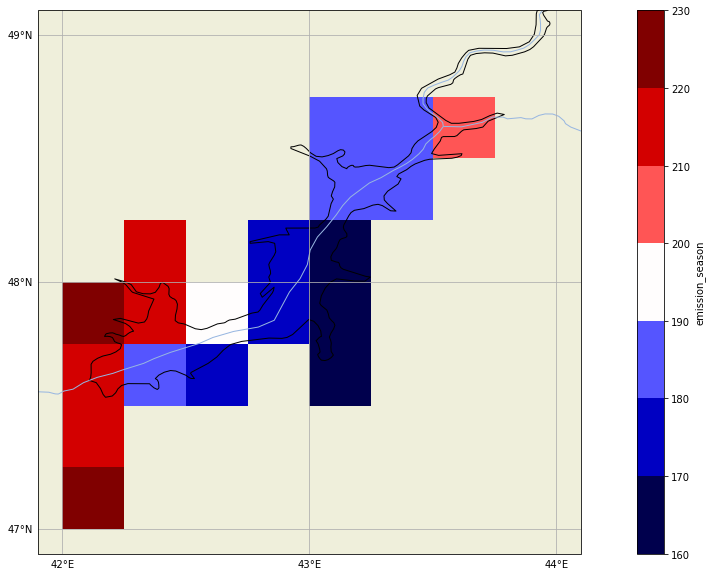

In [28]:
map_drawer(dauer_ts, [47, 48, 49], [42, 43, 44], stack=False)

По Иваньковскому водохранилищу

In [29]:
dauer_iv = ds['emission_season'].loc[56.3:57.3, 36:37.5]/(24*3600*1000000000)
dauer_iv = dauer_iv.astype('int')
dauer_iv = dauer_iv.where(dauer_iv != 0)
dauer_iv

<xarray.DataArray 'emission_season' (lat: 4, lon: 6)>
array([[ nan,  nan,  nan,  nan,  nan,  nan],
       [214., 213., 213., 213., 214.,  nan],
       [ nan,  nan, 212., 212., 213., 212.],
       [ nan,  nan,  nan,  nan,  nan, 216.]])
Coordinates:
  * lon      (lon) float64 36.12 36.38 36.62 36.88 37.12 37.38
  * lat      (lat) float64 56.38 56.62 56.88 57.12

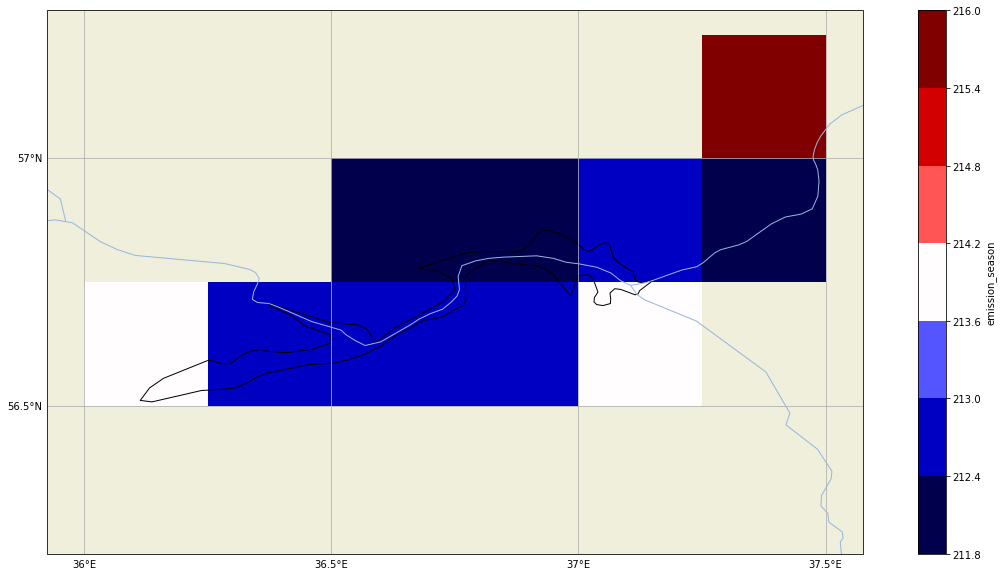

In [30]:
map_drawer(dauer_iv, np.arange(56, 57.5, 0.5,), np.arange(36, 37.6, 0.5), stack=False)

Продолжительность эмиссии метана на Чиркейском водохранилище

In [31]:
int(ds['emission_season'].loc[42.875, 46.875]/(24*3600*1000000000))

211

На самом деле Чиркейское водохранилище никогда не замерзает. Скорее всего, полученное значение является следствием недоучёта особенностей данного водного объекта составителями датасета

Дни начала эмиссии $CH_{4}$ на Цимлянском водохранилище

In [32]:
ts

<xarray.DataArray 'corrected_emission' (day: 365, gridcell: 19)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * gridcell  (gridcell) MultiIndex
  - lat       (gridcell) float64 47.12 47.38 47.62 47.62 ... 48.62 48.62 48.62
  - lon       (gridcell) float64 42.12 42.12 42.12 42.38 ... 43.12 43.38 43.62
Dimensions without coordinates: day

In [33]:
for i in range(len(ts.gridcell)):  
    a = 0
    for j in range(len(ts.day)):
        if np.isnan(ts[:, i].values[j]) == True:
            a += 1
        else:
            break
    print(f'№{i+1}, coord: {ts.gridcell.values[i]}, start: {a}')

№1, coord: (47.125, 42.125), start: 76
№2, coord: (47.375, 42.125), start: 80
№3, coord: (47.625, 42.125), start: 89
№4, coord: (47.625, 42.375), start: 96
№5, coord: (47.625, 42.625), start: 102
№6, coord: (47.625, 43.125), start: 104
№7, coord: (47.875, 42.125), start: 82
№8, coord: (47.875, 42.375), start: 87
№9, coord: (47.875, 42.625), start: 94
№10, coord: (47.875, 42.875), start: 102
№11, coord: (47.875, 43.125), start: 111
№12, coord: (48.125, 42.375), start: 87
№13, coord: (48.125, 42.875), start: 102
№14, coord: (48.125, 43.125), start: 111
№15, coord: (48.375, 43.125), start: 97
№16, coord: (48.375, 43.375), start: 95
№17, coord: (48.625, 43.125), start: 97
№18, coord: (48.625, 43.375), start: 95
№19, coord: (48.625, 43.625), start: 92


Дни начала эмиссии $CH_{4}$ на Иваньковском водохранилище

In [34]:
for i in range(len(iv.gridcell)):  
    a = 0
    for j in range(len(iv.day)):
        if np.isnan(iv[:, i].values[j]) == True:
            a += 1
        else:
            break
    print(f'№{i+1}, coord: {iv.gridcell.values[i]}, start: {a}')

№1, coord: (56.625, 36.125), start: 97
№2, coord: (56.625, 36.375), start: 97
№3, coord: (56.625, 36.625), start: 97
№4, coord: (56.625, 36.875), start: 97
№5, coord: (56.625, 37.125), start: 97
№6, coord: (56.875, 36.625), start: 97
№7, coord: (56.875, 36.875), start: 97
№8, coord: (56.875, 37.125), start: 97
№9, coord: (56.875, 37.375), start: 97
№10, coord: (57.125, 37.375), start: 98


День начала эмиссии $CH_{4}$ на Чиркейском водохранилище

In [35]:
a = 0
for j in range(len(year_ch)):
    if np.isnan(year_ch.values[j]) == True:
        a += 1
    else:
        break
print(f'{float(year_ch.lat)}, {float(year_ch.lon)}, start: {a}')

42.875, 46.875, start: 98


Дни окончания эмиссии $CH_{4}$ на Цимлянском водохранилище

In [36]:
for i in range(len(ts.gridcell)):
    a = 365
    for j in range(len(ts.day)-1, -1, -1):
        if np.isnan(ts[:, i].values[j]) == True:
            a -= 1
        else:
            break
    print(f'№ {i+1}, coord: {ts.gridcell.values[i]}, end: {a}')

№ 1, coord: (47.125, 42.125), end: 305
№ 2, coord: (47.375, 42.125), end: 291
№ 3, coord: (47.625, 42.125), end: 300
№ 4, coord: (47.625, 42.375), end: 285
№ 5, coord: (47.625, 42.625), end: 278
№ 6, coord: (47.625, 43.125), end: 273
№ 7, coord: (47.875, 42.125), end: 306
№ 8, coord: (47.875, 42.375), end: 299
№ 9, coord: (47.875, 42.625), end: 293
№ 10, coord: (47.875, 42.875), end: 276
№ 11, coord: (47.875, 43.125), end: 274
№ 12, coord: (48.125, 42.375), end: 299
№ 13, coord: (48.125, 42.875), end: 276
№ 14, coord: (48.125, 43.125), end: 274
№ 15, coord: (48.375, 43.125), end: 282
№ 16, coord: (48.375, 43.375), end: 284
№ 17, coord: (48.625, 43.125), end: 282
№ 18, coord: (48.625, 43.375), end: 284
№ 19, coord: (48.625, 43.625), end: 295


Дни окончания эмиссии $CH_{4}$ на Иваньковском водохранилище

In [37]:
for i in range(len(iv.gridcell)):
    a = 365
    for j in range(len(iv.day)-1, -1, -1):
        if np.isnan(iv[:, i].values[j]) == True:
            a -= 1
        else:
            break
    print(f'№ {i+1}, coord: {iv.gridcell.values[i]}, end: {a}')

№ 1, coord: (56.625, 36.125), end: 310
№ 2, coord: (56.625, 36.375), end: 309
№ 3, coord: (56.625, 36.625), end: 309
№ 4, coord: (56.625, 36.875), end: 310
№ 5, coord: (56.625, 37.125), end: 311
№ 6, coord: (56.875, 36.625), end: 309
№ 7, coord: (56.875, 36.875), end: 309
№ 8, coord: (56.875, 37.125), end: 310
№ 9, coord: (56.875, 37.375), end: 309
№ 10, coord: (57.125, 37.375), end: 314


День окончания эмиссии $CH_{4}$ на Чиркейском водохранилище

In [38]:
a = 365
for j in range(len(year_ch)-1, -1, -1):
    if np.isnan(year_ch.values[j]) == True:
        a -= 1
    else:
        break
print(f'{float(year_ch.lat)}, {float(year_ch.lon)}, end: {a}')

42.875, 46.875, end: 310
